In [1]:
pwd

'C:\\Users\\VIREN\\Desktop'

In [2]:
ls

 Volume in drive C is WIN 10
 Volume Serial Number is B634-FD98

 Directory of C:\Users\VIREN\Desktop

20-09-2022  10:18 PM    <DIR>          .
20-09-2022  10:18 PM    <DIR>          ..
20-09-2022  10:47 AM    <DIR>          .ipynb_checkpoints
20-09-2022  10:33 AM         1,072,083 Bank Telemarketing Project.ipynb
20-09-2022  10:00 AM           684,858 Churn_Modelling.csv
20-09-2022  10:18 PM         1,298,901 Customer_churn_prediction.ipynb
11-08-2022  10:17 AM           208,085 E_Commerce Analytics - RMF method_updated.ipynb
07-06-2022  10:47 AM        27,016,116 E-com_Data.xlsx
11-08-2022  10:17 AM           240,001 Final_output.xlsx
26-08-2022  06:19 PM           138,377 GSRTC_ticket.pdf
14-09-2022  05:50 PM           266,065 Hotel Demand Prediction Project.ipynb
11-08-2022  10:08 AM             2,358 Microsoft Edge.lnk
31-07-2022  08:58 PM             2,353 MongoDBCompass.lnk
29-08-2022  10:24 AM            15,087 ORGANIZATIONAL BEHAVIOUR.docx
14-09-2022  05:35 PM           442,60

# Business Problem

Business Problem is very simple, There is a bank who wants to retain their existing customers who may churn, for that they have to know which existing customers has the highest probability of leaving the company.company wont find out how many customer leave the company or not.

# Data

We have 10000 rows with 13 features and 1 target variable, Every row tells us different customer details and whether they churned or not after 2 months of observation.

# Machine Learning Problem

So Converting a Business problem to a Machine Learning problem, This seems to be a simple binary classification problem in which we have 2 classes, "yes" and "no". We have some numerical features, some categorical features.

In [3]:
# Customer churn prediction

In [4]:
# import the warnings
import warnings
warnings.filterwarnings("ignore")


In [5]:
# importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
customer = pd.read_csv("Churn_Modelling.csv")
customer.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Observation

Here we got to know that we have total 14 columns, out of which 1 will be our class lable and rest 13 will be our features.
So, we will divide these features into numerical and categorical.
Note:- RowNumber, CustomerID and Surname has no use in churn prection, so we won't take these columns into acccount.

In [6]:
# Showing information of data
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# shape of data file
customer.shape

(10000, 14)

# Observation

In [8]:
# showing number of columns in data
customer.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# checking weather the data contains any missing value or not
customer.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Observation

There is no missing value present inside data

In [10]:
# find the unique value from dataset
# customer.nunique()
customer['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [11]:
customer.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# Distributing the data into numerical and categorical features
df_numerical = customer[['CreditScore','Age','Balance','EstimatedSalary','Exited']]
df_categorical = customer[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]

# show the categorical data
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


In [13]:
# show the numerical data
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


# Observation

1. in this data we have two features named as numerical features and categorical features.
2. we will do EDA on numerical fetures and then we will do sampling in categorical fetures.

In [14]:
# counting the number of customers who has left the bank and who hasn't left the bank
customer['Exited'].value_counts()
# 0 indicates customer who has stayed in bank
# 1 indicated customer who has left the bank

0    7963
1    2037
Name: Exited, dtype: int64

# EDA for numerical data

In [15]:
# showing the numerical data and how many columns are present in data set
df_numerical.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited'], dtype='object')

# 1. Credit Score

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

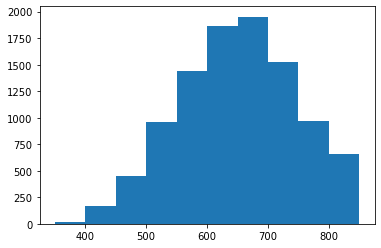

In [16]:
# plotting histogram
plt.hist(df_numerical['CreditScore'])
# The below histogram shows that curve is normally distibuted, and values of 
# credit score lies between 550 and 750.
# There are few people whose credit score is less than 550 and more than 750.

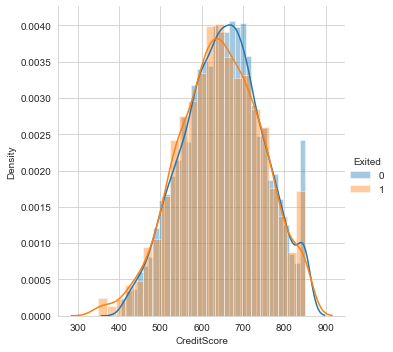

In [17]:
# plotting distplot for showcasing number of customer left or stayed in bank
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid");
sns.FacetGrid(df_numerical, hue="Exited", size=5).map(sns.distplot,"CreditScore").add_legend()
plt.show()
# The below graph is not useful to clearly predict who stayed and who left the bank.

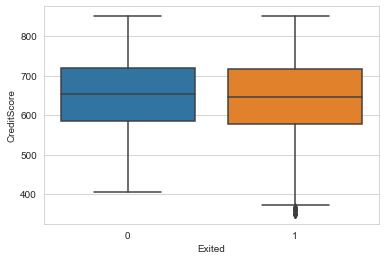

In [18]:
sns.boxplot(x='Exited', y='CreditScore', data=df_numerical)
plt.show()

# Observation
a) for Customer who Stay in bank :

1.25% of Customer has CreditScore is near to 580

2.50% of Customer has CreditScore is near to 650

2.75% of customer has creditscore isnear to 710

b) for Customer who left Bank has Credit Score is less than below 400

c)Some part of data of creditscore is overlaping as show in box plotit show most of people has same/ nearly same credit score

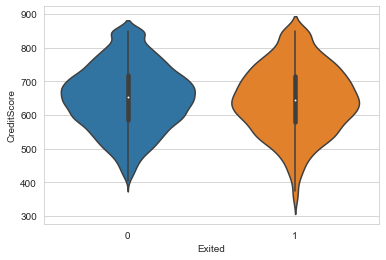

In [19]:
sns.violinplot(x="Exited", y="CreditScore", data=df_numerical)
plt.show()

# Obsevation :
1. This plot show the overlaping the data,violin plot is more informative than box plot.
2. This Plot is not helpig for Analysis Purpose.
3. violin plots depict summary statistics and the density of each customer who left or Stay in bank.

# 2. Age

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

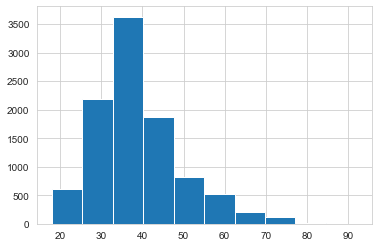

In [20]:
# check people of what age group is present in data set
plt.hist(df_numerical[['Age']])

# Observation :
1. This Plot Show the maximum customer is in between the Age Group of 30 to 40 which is above the 2000
2. Very Less Customer after the 50 and before the 30 which is below 500

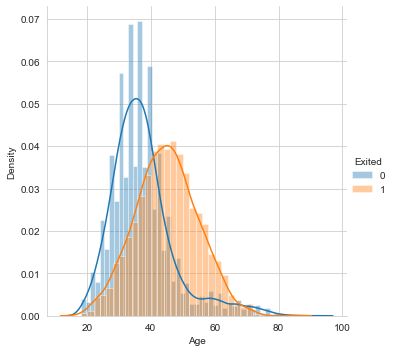

In [21]:
# Distplot
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.FacetGrid(df_numerical, hue="Exited", size=5).map(sns.distplot,"Age").add_legend()
plt.show()

# Obervation :
1. This Plot Show the the cutomer Who left the bank is in Age Group 40 to 60 is below 0.42 cm
2. Most of Customer Who Stay in bank is in Between Age Group of 25 to 30 is below 0.07 cm

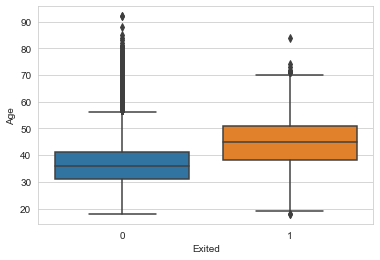

In [22]:
sns.boxplot(x="Exited", y="Age", data=df_numerical)
plt.show()

# Observation :
1. Customer who stay in Bank :
25% of customer who Stay in Bank is Above Age of 31.
50% of customer who Stay in Bank is in between Age of 32 to 35.
75% of customer who Stay in Bank is in between Age of 36 to 41.

2. Customer Who left the Bank :
25% of customer left the bank is above 39.
50% of customer left the bank is between 39 to 45.
75% of customer left the bank is between 46 to 51.
The Above Plot Show that customer Who Left and Stay is overlaping At the Age of 38 to 41.

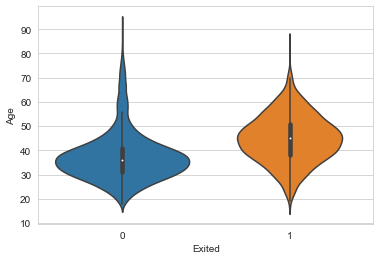

In [23]:
sns.violinplot(x="Exited", y="Age", data=df_numerical)
plt.show()

# Obsevation :
1. Posibility Customer Who stay in bank is between Age of 30 to 41

2. Posibility Customer Who left the Bank is Between Age of 39 to 51

# 3. Balance

(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

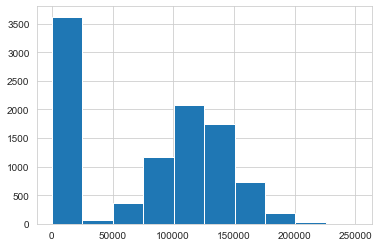

In [24]:
# check the how many people have maximum amount of balance
plt.hist(df_numerical['Balance'])

# Observation
1. Above Plot Show 3500 Customer has Zero bank Balance

2. Around 2000 Customer have Maximum Balance liesin Between 1 Lakh to 1.25 Lakh

3. Below 300 customer have diferent amount of balance like 50k,75k,1.5 lakh

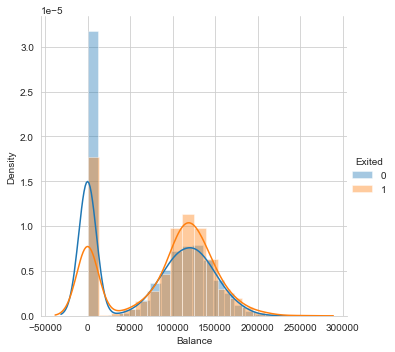

In [25]:
sns.set_style("whitegrid")
sns.FacetGrid(df_numerical, hue="Exited", size=5).map(sns.distplot, "Balance").add_legend();
plt.show()

# Obervation
1. Majority Customer who stay in Bank have Zero Bank Balance is below 3.2 cm
2. less of customer have Zero Bank balace have left the Bank is below 1.75 cm
3. customer who stay in bank balance between 75k to 1.5 lakh is below 0.75 cm

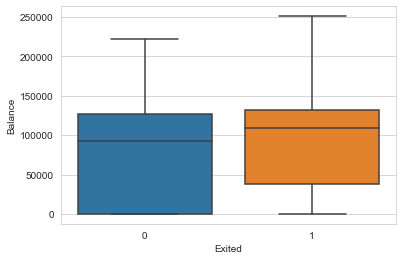

In [26]:
sns.boxplot(x="Exited", y="Balance", data=df_numerical)
plt.show()

# Obervation :
1. Customer who stay in Bank :
A. 25% of customer who Stay in Bank is haveing Bank balance is zero.
B. 50% of customer who Stay in Bank is haveing Bank balance is below 80k
C. 75% of customer who Stay in Bank is haveing BAnk balance is 1.2 lakh

2. Customer Who left the Bank :
A. 25% of customer left the bank is haveing bank balance is in between 46k
B. 50% of customer left the bank is haveing bank balance is below 1.2 lakh
c. 75% of customer left the bank is haveing bank balance is below 1.3 lakh
D. Most of people whoes Bank Balnce is less than 75k has Stayed in Bank

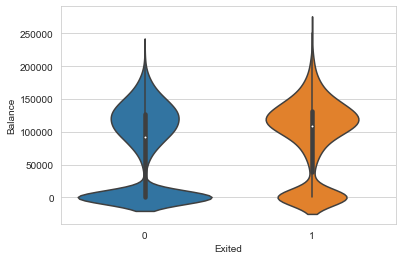

In [27]:
sns.violinplot(x="Exited",y="Balance",data=df_numerical)
plt.show()

# Observation
Most of people who stay or left bank haveing bank balance is between 40k to 1.2lakh

In [28]:
# check the percecntile of balance
print(np.percentile(df_numerical["Balance"],35))
print(np.percentile(df_numerical["Balance"],40))

0.0
73080.908


# Observation :
1. Percentile Show the 35% of customer Has Bank Balance is Zero
2. 40% of Customer haveing 73080.90 Percentile of Bank Balnace

# 4. Estimated salary

(array([ 987.,  968., 1006., 1027., 1002., 1027., 1007.,  982., 1009.,
         985.]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <BarContainer object of 10 artists>)

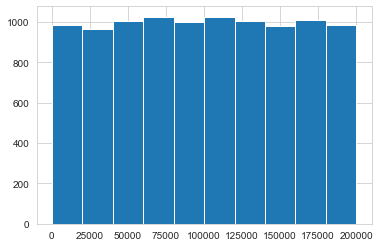

In [29]:
# Histogram of estimated salary
plt.hist(df_numerical["EstimatedSalary"])

# Observation :
1. Above Plot show customer has Estimatesalary is Unifromly Distributed

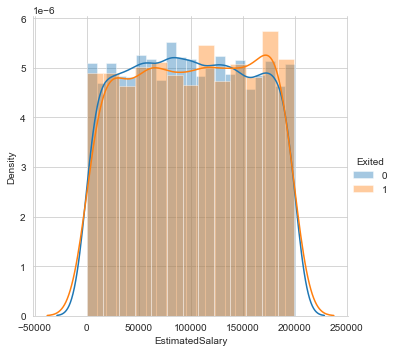

In [30]:
# Distplot
sns.set_style("whitegrid")
sns.FacetGrid(df_numerical, hue="Exited", size=5).map(sns.distplot,"EstimatedSalary").add_legend()
plt.show()

# Observation
1. This Plot is not helping us to Analyse Data Because Data is uniformly Distributed

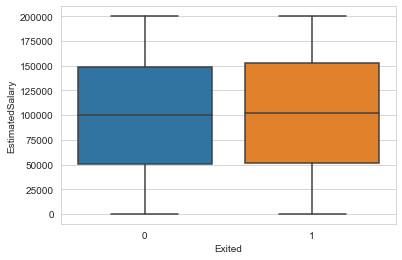

In [31]:
# boxplot
sns.boxplot(x="Exited", y="EstimatedSalary", data=df_numerical)
plt.show()

# Observation
1. Customer who stay in Bank and left the Bank have :
A. 25% of customer who Stay and left the Bank is haveing Estimated Salary is 50k
B. 50% of customer who Stay and left the Bank is haveing Estimated Salary is 1 lakh
c. 75% of customer who Stay and left the Bank is haveing Estimated Salary is 1.5 lakh
2. Both customer who left and stay in bank has Estimated Salary is between 50k to 1.5 lakh

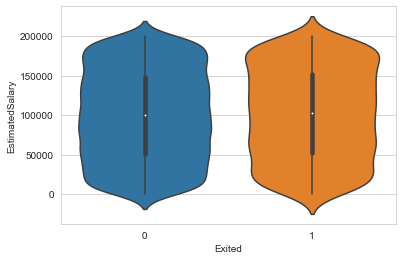

In [32]:
sns.violinplot(x="Exited", y="EstimatedSalary", data=df_numerical)
plt.show()

# Observation :
1. This Plot is not helping us to Analyse Data

# Bivariate Analysis

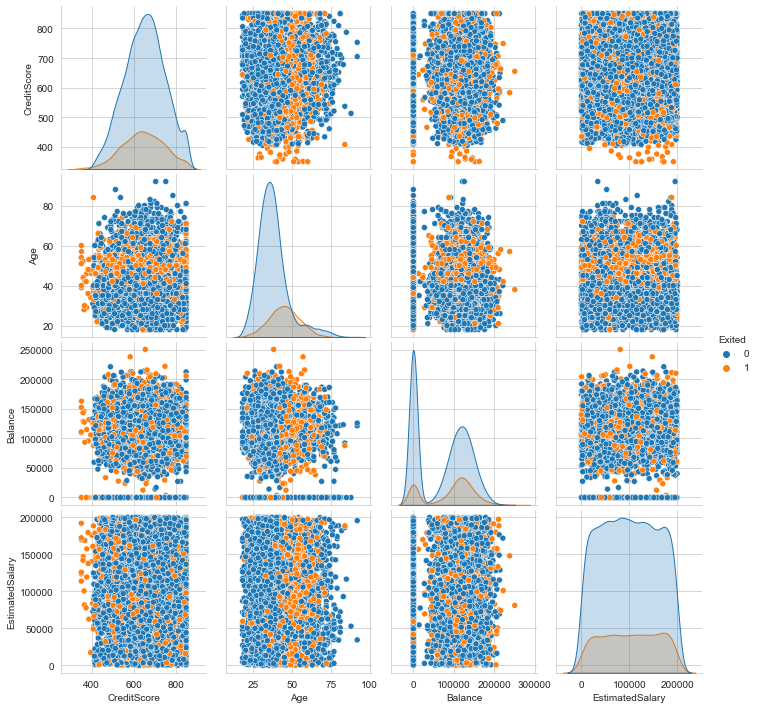

In [33]:
# check the relationship between two features
sns.pairplot(df_numerical, hue="Exited")

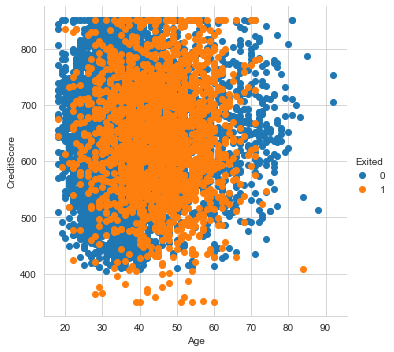

In [34]:
#Lets plot the scatter plot between Age and Cerdit Score
#BIVARIATE ANALYSIS
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.FacetGrid(df_numerical, hue="Exited", size=5).map(plt.scatter,"Age","CreditScore").add_legend()
plt.show()

# Observation
1. we can see that circle region is form on center of plot (Age Group 30 to 60 )this show the customer who left the bank.
2. People have credit Score between 500 to 750 who left the Bank.

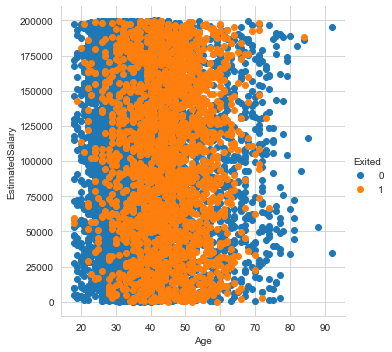

In [35]:
#Lets plot the scatter plot between Age and Estimated salary
#BIVARIATE ANALYSIS
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.FacetGrid(df_numerical, hue="Exited", size=5).map(plt.scatter,"Age","EstimatedSalary").add_legend()
plt.show()

# Observation
1. We can see from Above Plot is Age group between 30 and 60 are left tha bank
2. Before Age 30 and After 60 Age Customer Are likely to stay in Bank.
3. we can see if we ignore some data points, In Age before 15 and after 65 customer left the Bank
4. In Age 35 to 60 and Estimated Salary 0 to 2 lakh , high churning happened

# Scaling of Numerical Feature

In [36]:
# showing the numerical feature
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0
...,...,...,...,...,...
9995,771,39,0.00,96270.64,0
9996,516,35,57369.61,101699.77,0
9997,709,36,0.00,42085.58,1
9998,772,42,75075.31,92888.52,1


In [37]:
# scaling of numerical data for balancing the data
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
CS = scaling.fit_transform(df_numerical[['CreditScore']])
age = scaling.fit_transform(df_numerical[['Age']])
balance = scaling.fit_transform(df_numerical[['Balance']])
ES = scaling.fit_transform(df_numerical[['EstimatedSalary']])
df_numerical['CreditScore'] = CS
df_numerical['Age'] = age
df_numerical['Balance'] = balance
df_numerical['EstimatedSalary'] = ES

In [38]:
# show numerical feature after scaling
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


# Observation
1. After the Scaling of numerical all Feature . all numerical feature are Scale in between 0 to 1
2. for that we Use Min Max Scaler for Scaling the numerical feature
3. scaling of the data makes it easy for a model to learn and understand the problem.

# Categorical Feature

In [39]:
# Show categorical feature
df_categorical

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,France,Female,2,1,1,1,1
1,Spain,Female,1,1,0,1,0
2,France,Female,8,3,1,0,1
3,France,Female,1,2,0,0,0
4,Spain,Female,2,1,1,1,0
...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0
9996,France,Male,10,1,1,1,0
9997,France,Female,7,1,0,1,1
9998,Germany,Male,3,2,1,0,1


# One hot encoding

In [40]:
# one hot encoding helps us convert catergorical variable into numeical variable
categorical = ["Geography","Gender"]
df_categorical = pd.get_dummies(df_categorical, drop_first = False, columns=categorical)
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,1,1,0
2,8,3,1,0,1,1,0,0,1,0
3,1,2,0,0,0,1,0,0,1,0
4,2,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,1,0,0,0,1
9996,10,1,1,1,0,1,0,0,0,1
9997,7,1,0,1,1,1,0,0,1,0
9998,3,2,1,0,1,0,1,0,0,1


# Observation
1. In one hot encoding we are converting the categorical data into numeric data to help understand the data properly to the machine.
2. in turn improve predictions as well as classification accuracy of a model.
3. And to minimise the number of columns(features) we Adjusted the data such way that , where Male and female were 2 columns we convert into 1 (Gender_male). which tales us the customer is male or not that will ultimately tell you that if customer is not male then its female.

# Num of Products

In [41]:
import warnings
warnings.filterwarnings("ignore")
a= df_categorical['NumOfProducts'].value_counts()
a

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

<AxesSubplot:>

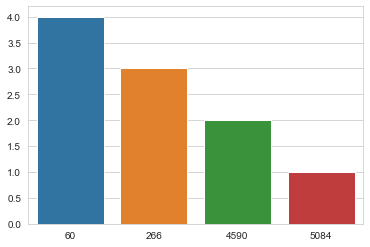

In [42]:
# bar plot
sns.barplot(x=a.values, y=a.index)

# Observation
1. 5084 customer have atleast one product
2. 4590 Customer have atleast two number of product
3. 266 customer have atleast there number of product
4. 60 customer have atleast four number of product
5. As the Number customer is decrease as number of product increase

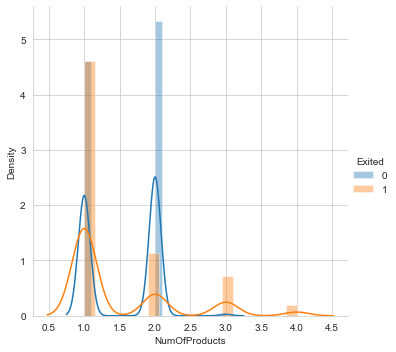

In [43]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5).map(sns.distplot, "NumOfProducts").add_legend()
plt.show()

# Observation
1. Number of Product 2 which is bought by customer who Stay in bank
2. Number of Product in between 2 to 4 which is bought by customer Who left tha Bank

(-1.1059349205019084,
 1.1002826158397652,
 -1.116497450906123,
 1.1041122438861788)

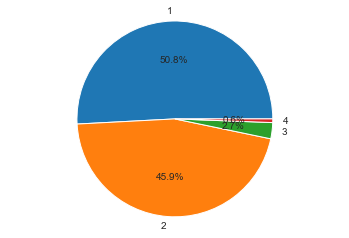

In [44]:
labels = a.index
sizes = a.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False)
plt.axis('equal')

# obsevation
1. 50% of Customer at lest buy one Product from the bank
2. 46 % of Customer at leat buy 2 product from bank

# Tenure

In [45]:
import warnings
warnings.filterwarnings("ignore")
b=df_categorical['Tenure'].value_counts()
b

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<AxesSubplot:>

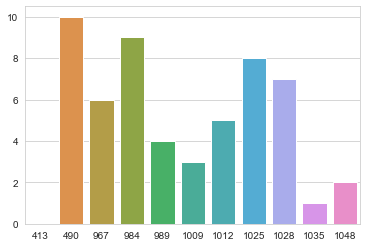

In [46]:
sns.barplot(x=b.values,y=b.index)

# Observation
There is different type 11 Tenure which is in between 0 to 10 year

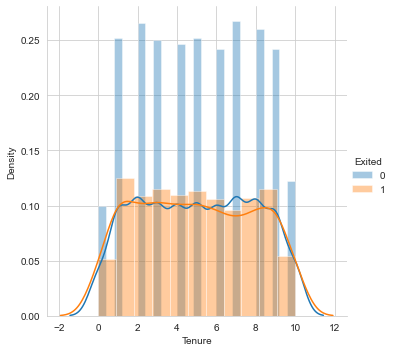

In [47]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5).map(sns.distplot, "Tenure").add_legend()
plt.show()

(-1.1058178224184918,
 1.1002770391627854,
 -1.1056794625804278,
 1.1052094675315791)

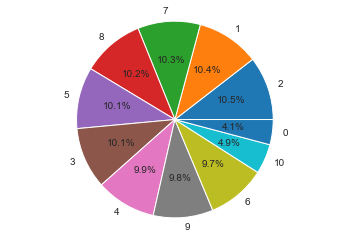

In [48]:
labels = b.index
sizes =b.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False)
plt.axis('equal')

# Obsevation
1. The Above Chart show that 4.9% cutomer has Tenure of 10 year
2. 4.1% Cutomer has 0 year of Tenure
3. 10.5% of Customer has 2 Year of Tenure

# Has Credit card

In [49]:
import warnings
warnings.filterwarnings("ignore")
c= df_categorical["HasCrCard"].value_counts()
c

1    7055
0    2945
Name: HasCrCard, dtype: int64

# Observation
1. 1 for Customer who desnot have Credit card
2. 0 fro Cutomer has Credit Card

<AxesSubplot:>

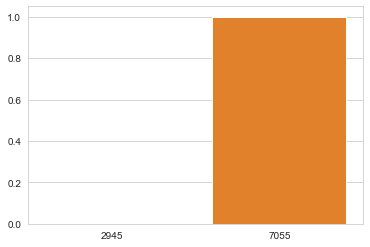

In [50]:
sns.barplot(x=c.values, y=c.index)

# Observation
1. Less Number of Credit Card use by Customer
2. 29445 Cutomer Who use Credit card and 7055 number of customer Has no credit Card

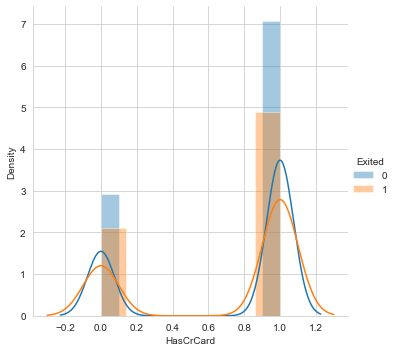

In [51]:
import warnings
warnings.filterwarnings("ignore")
#distplot
sns.set_style("whitegrid");
sns.FacetGrid(df_categorical, hue="Exited", size=5).map(sns.distplot, "HasCrCard").add_legend()
plt.show()

# Obsevation
PDF is not giving us much information to analyse data

(-1.1179836976946826,
 1.1008563665568896,
 -1.1127024981118583,
 1.1140147351863388)

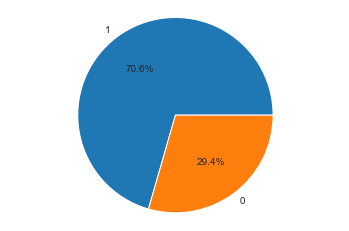

In [52]:
labels = c.index
sizes =c.values 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False)
plt.axis('equal')

# Obsevation
1. here we can see from pie chart that 70.6% of the customers does not have credit card.
2. 29.4% customers have credit card

In [53]:
stayed = df_numerical[df_numerical['Exited']==0]
left = df_numerical[df_numerical['Exited']==1]

In [54]:
left

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
2,0.304,0.324324,0.636357,0.569654,1
5,0.590,0.351351,0.453394,0.748797,1
7,0.052,0.148649,0.458540,0.596733,1
16,0.606,0.540541,0.528513,0.025433,1
...,...,...,...,...,...
9981,0.296,0.324324,0.605982,0.267193,1
9982,0.610,0.378378,0.546617,0.575729,1
9991,0.494,0.472973,0.352259,0.346899,1
9997,0.718,0.243243,0.000000,0.210390,1


In [55]:
stayed

,CreditScore,Age,Balance,EstimatedSalary,Exited
1,0.516,0.310811,0.334031,0.562709,0
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
6,0.944,0.432432,0.000000,0.050261,0
8,0.302,0.351351,0.566170,0.374680,0
...,...,...,...,...,...
9993,0.588,0.135135,0.618021,0.145854,0
9994,0.900,0.148649,0.000000,0.838890,0
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0


# Observation
Here we have saperated rows of customers who have left from customers who have stayed.

# Mean, Median and Standard Deviation

# Credit Score

In [56]:
# Mean
print('Mean :')
print((np.mean(stayed['CreditScore'])),"for customers who stayed")
print((np.mean(left['CreditScore'])),"for customers who left")
print("--------------------------------------------------------")

# Median
print('Median :')
print((np.median(stayed['CreditScore'])),"for customers who stayed")
print((np.median(left['CreditScore'])),"for customers who left")
print("--------------------------------------------------------")

#Standard Deviation
print('Standard Deviation :')
print((np.std(stayed['CreditScore'])),"for customers who stayed")
print((np.std(left['CreditScore'])),"for customers who left")

Mean :
0.6037063920632906 for customers who stayed
0.5907029945999023 for customers who left
--------------------------------------------------------
Median :
0.606 for customers who stayed
0.592 for customers who left
--------------------------------------------------------
Standard Deviation :
0.19129566143070356 for customers who stayed
0.20059374962025214 for customers who left


# Age

In [57]:
# Mean
print('Mean :')
print((np.mean(stayed['Age'])),"for customers who stayed")
print((np.mean(left['Age'])),"for customers who left")
print("--------------------------------------------------------")

# Median
print('Median :')
print((np.median(stayed['Age'])),"for customers who stayed")
print((np.median(left['Age'])),"for customers who left")
print("--------------------------------------------------------")

#Standard Deviation
print('Standard Deviation :')
print((np.std(stayed['Age'])),"for customers who stayed")
print((np.std(left['Age'])),"for customers who left")

Mean :
0.2622755242998879 for customers who stayed
0.36267563587151197 for customers who left
--------------------------------------------------------
Median :
0.24324324324324326 for customers who stayed
0.36486486486486486 for customers who left
--------------------------------------------------------
Standard Deviation :
0.1368206366951552 for customers who stayed
0.13188061078578414 for customers who left


# Balance

In [58]:
# Mean
print('Mean :')
print((np.mean(stayed['Balance'])),"for customers who stayed")
print((np.mean(left['Balance'])),"for customers who left")
print("--------------------------------------------------------")

# Median
print('Median :')
print((np.median(stayed['Balance'])),"for customers who stayed")
print((np.median(left['Balance'])),"for customers who left")
print("--------------------------------------------------------")

#Standard Deviation
print('Standard Deviation :')
print((np.std(stayed['Balance'])),"for customers who stayed")
print((np.std(left['Balance'])),"for customers who left")

Mean :
0.28993961962345854 for customers who stayed
0.36312966486616327 for customers who left
--------------------------------------------------------
Median :
0.3669724229467032 for customers who stayed
0.43583149636571566 for customers who left
--------------------------------------------------------
Standard Deviation :
0.2504765752611028 for customers who stayed
0.23255046650406813 for customers who left


# Obervation
we see the change in mean and Median in Balance

# Estimated Salary

In [59]:
# Mean
print('Mean :')
print((np.mean(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.mean(left['EstimatedSalary'])),"for customers who left")
print("--------------------------------------------------------")

# Median
print('Median :')
print((np.median(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.median(left['EstimatedSalary'])),"for customers who left")
print("--------------------------------------------------------")

#Standard Deviation
print('Standard Deviation :')
print((np.std(stayed['EstimatedSalary'])),"for customers who stayed")
print((np.std(left['EstimatedSalary'])),"for customers who left")

Mean :
0.4986816829604479 for customers who stayed
0.5073189366118586 for customers who left
--------------------------------------------------------
Median :
0.4982148795209942 for customers who stayed
0.5122952241939105 for customers who left
--------------------------------------------------------
Standard Deviation :
0.28703732372842555 for customers who stayed
0.2895186550367807 for customers who left


In [60]:
df_numerical

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,0.538,0.324324,0.000000,0.506735,1
1,0.516,0.310811,0.334031,0.562709,0
2,0.304,0.324324,0.636357,0.569654,1
3,0.698,0.283784,0.000000,0.469120,0
4,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...
9995,0.842,0.283784,0.000000,0.481341,0
9996,0.332,0.229730,0.228657,0.508490,0
9997,0.718,0.243243,0.000000,0.210390,1
9998,0.844,0.324324,0.299226,0.464429,1


In [63]:
# removing the exited column to get rid of duplcate columns
df_categorical
df_categorical2 = df_categorical.drop(['Exited'], axis=1)

In [64]:
df_categorical

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,0,1,1,0
2,8,3,1,0,1,1,0,0,1,0
3,1,2,0,0,0,1,0,0,1,0
4,2,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,0,1,0,0,0,1
9996,10,1,1,1,0,1,0,0,0,1
9997,7,1,0,1,1,1,0,0,1,0
9998,3,2,1,0,1,0,1,0,0,1


In [65]:
df_categorical2

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,2,1,1,1,1,0,0,1,0
1,1,1,0,1,0,0,1,1,0
2,8,3,1,0,1,0,0,1,0
3,1,2,0,0,1,0,0,1,0
4,2,1,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1
9996,10,1,1,1,1,0,0,0,1
9997,7,1,0,1,1,0,0,1,0
9998,3,2,1,0,0,1,0,0,1


In [66]:
# concatinating 2 dataframes
df_concat2 = pd.concat([df_categorical2, df_numerical], axis =1)
df_concat2

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary,Exited
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735,1
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709,0
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654,1
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120,0
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341,0
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490,0
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390,1
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429,1


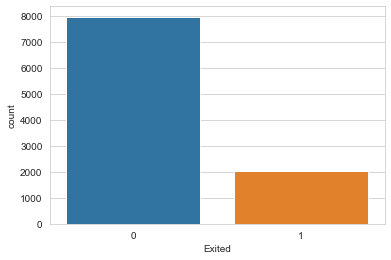

0    7963
1    2037
Name: Exited, dtype: int64

In [68]:
# Lets check weather data is balanced or not
import seaborn as sns
sns.countplot('Exited', data=df_concat2)
plt.show()
# to be exact, lets find the number
df_concat2['Exited'].value_counts()

In [69]:
#sepearting features from classlabels
X=df_concat2.iloc[:,0:13]

In [71]:
# seprating the train data and test data from data  
# Training data
X 

,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Balance,EstimatedSalary
0,2,1,1,1,1,0,0,1,0,0.538,0.324324,0.000000,0.506735
1,1,1,0,1,0,0,1,1,0,0.516,0.310811,0.334031,0.562709
2,8,3,1,0,1,0,0,1,0,0.304,0.324324,0.636357,0.569654
3,1,2,0,0,1,0,0,1,0,0.698,0.283784,0.000000,0.469120
4,2,1,1,1,0,0,1,1,0,1.000,0.337838,0.500246,0.395400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,1,0,0,0,1,0.842,0.283784,0.000000,0.481341
9996,10,1,1,1,1,0,0,0,1,0.332,0.229730,0.228657,0.508490
9997,7,1,0,1,1,0,0,1,0,0.718,0.243243,0.000000,0.210390
9998,3,2,1,0,0,1,0,0,1,0.844,0.324324,0.299226,0.464429


In [72]:
#sepearting classlabels from features
# Test Data
Y=df_concat2.iloc[:,13:]
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [73]:
# spliting training and testing Data 
#spliting the data into train and test
import sklearn 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

In [74]:
# train data to model 
X_train.shape

(7000, 13)

In [75]:
# train data to model
y_train.shape

(7000, 1)

In [76]:
# test data to model
X_test.shape

(3000, 13)

In [77]:
#test data to medel 
y_test.shape

(3000, 1)

# Model Training

# KNN (K-Nearest Neighbour)

## we will apply knn to our data and thrn check its performance

In [79]:
# Applying KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN classifier
hyper_parameter_k = [{'n_neighbors':[3,5,7,9]}]
clf = KNeighborsClassifier()
modelknn = GridSearchCV( clf,hyper_parameter_k,scoring='accuracy')
modelknn.fit(X_train, y_train)

print(modelknn.best_estimator_)
print("Training accuracy is",modelknn.score(X_train,y_train))
print("Testing accuracy is ",modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=9)
Training accuracy is 0.8337142857142857
Testing accuracy is  0.813


In [80]:
#PREDICTIONS
knn_test_prediction=modelknn.predict(X_test)#this is your y_pred_test
knn_train_predictions=modelknn.predict(X_train)#y_pred_train

In [81]:
#evaluation
from sklearn.metrics import f1_score
X_knntest_F1score=f1_score(y_test,knn_test_prediction)
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data

X_knntrain_F1score=f1_score(y_train,knn_train_predictions)
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

Testing f1 score is 0.31334149326805383
Training f1 score is 0.4435946462715106


In [82]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf_train=confusion_matrix(y_train,knn_train_predictions)
print(x_knn_cf_train)

[[5372  175]
 [ 989  464]]


Train confusion matrix


<AxesSubplot:>

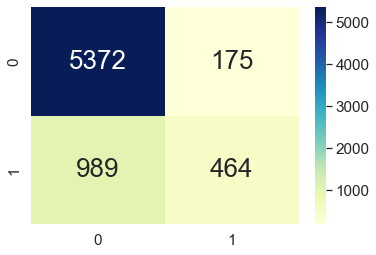

In [83]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [84]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_knn_cf=confusion_matrix(y_test,knn_test_prediction)
print(x_knn_cf)

[[2311  105]
 [ 456  128]]


Test confusion matrix


<AxesSubplot:>

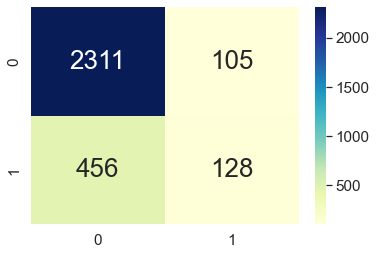

In [85]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_knn_cf, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [86]:
#Precison
#training data
from sklearn.metrics import precision_score
x_knn_p=precision_score(y_train,knn_train_predictions)
print("The precision of x_knn_p for training data",x_knn_p)

The precision of x_knn_p for training data 0.7261345852895149


In [87]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_knn_p_test=precision_score(y_test,knn_test_prediction)
print("The precision of x_knn_p for testing data",x_knn_p_test)

The precision of x_knn_p for testing data 0.5493562231759657


In [88]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_knn_r_train=recall_score(y_train,knn_train_predictions)
print("The recall of training data for knn is",x_knn_r_train)

The recall of training data for knn is 0.3193392980041294


In [89]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_knn_r_test=recall_score(y_test,knn_test_prediction)
print("The recall of test data for knn is",x_knn_r_test)

The recall of test data for knn is 0.2191780821917808


In [90]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,knn_train_predictions)

print("Training accuracy is",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,knn_test_prediction)

print("Testing accuracy is",b)


Training accuracy is 0.8337142857142857
Testing accuracy is 0.813


# Logistic Regression

In [91]:
#we are using simple gridsearchcv to tune the hyperparameter C
#here we are not using smote samples

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]

LRmodel=GridSearchCV(LogisticRegression(max_iter=400,class_weight='balanced'),tuned_parameters)

LRmodel.fit(X_train,y_train)

print(LRmodel.best_estimator_)
print("Training",LRmodel.score(X_train,y_train))
print("Testing",LRmodel.score(X_test,y_test))

LogisticRegression(C=10000, class_weight='balanced', max_iter=400)
Training 0.7132857142857143
Testing 0.7053333333333334


In [92]:
#PREDICTIONS
logistic_test_prediction=LRmodel.predict(X_test)#this is your y_pred_test
logistic_train_prediction=LRmodel.predict(X_train)#y_pred_train

In [93]:
#evaluation
from sklearn.metrics import f1_score
X_logistic_train_F1score=f1_score(y_train,logistic_train_prediction)
print("Training f1 score is",X_knntrain_F1score) #f1 score on train data

X_logistic_test_F1score=f1_score(y_test,logistic_test_prediction)
print("Testing f1 score is",X_knntest_F1score) #f1 score on test data

Training f1 score is 0.4435946462715106
Testing f1 score is 0.31334149326805383


In [94]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_logistic_cf_train=confusion_matrix(y_train,logistic_train_prediction)
print(x_logistic_cf_train)

[[3977 1570]
 [ 437 1016]]


Train confusion matrix


<AxesSubplot:>

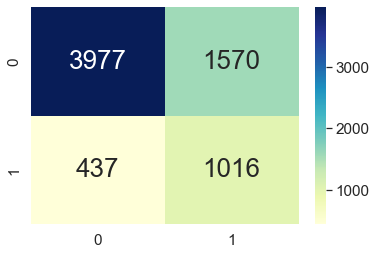

In [95]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_logistic_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [96]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_logistic_cf_test=confusion_matrix(y_test,logistic_test_prediction)
print(x_logistic_cf_test)

[[1706  710]
 [ 174  410]]


Test confusion matrix


<AxesSubplot:>

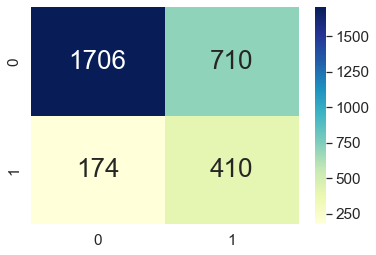

In [97]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_logistic_cf_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [98]:
#Precison
#training data
from sklearn.metrics import precision_score
x_logistic_cf_train=precision_score(y_train,logistic_train_prediction)
print("The precision of logistic for training data",x_logistic_cf_train)

The precision of logistic for training data 0.3928847641144625


In [99]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_logistic_p_test=precision_score(y_test,logistic_test_prediction)
print("The precision of logistic for testing data",x_logistic_p_test)

The precision of logistic for testing data 0.36607142857142855


In [100]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_logistic_r_train=recall_score(y_train,logistic_train_prediction)
print("The recall of training data for logistic is",x_logistic_r_train)

The recall of training data for logistic is 0.6992429456297315


In [101]:
#RECALL
#Test DATA
from sklearn.metrics import recall_score
x_logistic_test=recall_score(y_test,logistic_test_prediction)
print("The recall of test data for logistic is",x_logistic_test)

The recall of test data for logistic is 0.702054794520548


In [102]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,logistic_train_prediction)

print("Training accuracy of logistic",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,logistic_test_prediction)

print("Testing accuracy of logistic ",b)

Training accuracy of logistic 0.7132857142857143
Testing accuracy of logistic  0.7053333333333334


# SVM (Support Vector Machine)

In [103]:
#svm(support vector machine)
from sklearn import svm
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
smodel=GridSearchCV(clf,tuned_parameters,cv=3)

smodel.fit(X_train,y_train)

print(smodel.best_estimator_)
print(smodel.score(X_test,y_test))
# Fit the classifier to the data

SVC(C=10)
0.8323333333333334


In [104]:
#PREDICTIONS
svm_test_prediction=smodel.predict(X_test)#this is your y_pred_test
svm_train_prediction=smodel.predict(X_train)#y_pred_train

In [105]:
#evaluation
from sklearn.metrics import f1_score

X_svm_F1score=f1_score(y_train,svm_train_prediction)
print("Training f1 score is",X_svm_F1score) #f1 score on train data

X_svm_F1score=f1_score(y_test,svm_test_prediction)
print("Testing f1 score is",X_svm_F1score) #f1 score on test data

Training f1 score is 0.27845176198729055
Testing f1 score is 0.2844950213371266


In [106]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_svm_cf_train=confusion_matrix(y_train,svm_train_prediction)
print(x_svm_cf_train)

[[5510   37]
 [1212  241]]


Train confusion matrix


<AxesSubplot:>

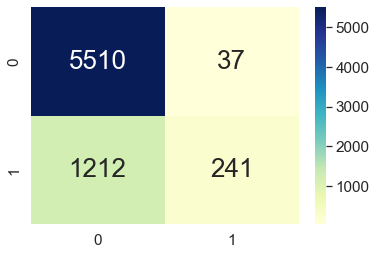

In [107]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_svm_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [108]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_svm_cf_test=confusion_matrix(y_test,svm_test_prediction)
print(x_svm_cf_test)

[[2397   19]
 [ 484  100]]


Test confusion matrix


<AxesSubplot:>

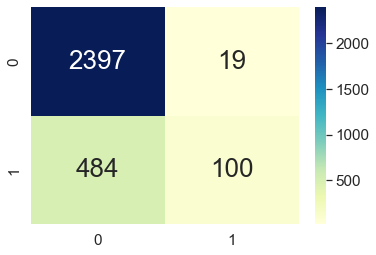

In [109]:
print("Test confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_svm_cf_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [110]:
#Precison
#training data
from sklearn.metrics import precision_score
x_svm_cf_train=precision_score(y_train,svm_train_prediction)
print("The precision of svm for training data",x_svm_cf_train)

The precision of svm for training data 0.8669064748201439


In [111]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_svm_cf_test=precision_score(y_train,logistic_train_prediction)
print("The precision of svm for testing data",x_svm_cf_test)

The precision of svm for testing data 0.3928847641144625


In [112]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_svm_r_train=recall_score(y_train,svm_train_prediction)
print("The recall of training data for svm is",x_svm_r_train)

The recall of training data for svm is 0.16586373021335168


In [113]:
#RECALL
#Testing DATA
from sklearn.metrics import recall_score
x_svm_r_test=recall_score(y_train,svm_train_prediction)
print("The recall of training data for svm is",x_svm_r_test)

The recall of training data for svm is 0.16586373021335168


In [114]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,svm_train_prediction)

print("Training accuracy of svm",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,svm_test_prediction)

print("Testing accuracy of svm ",b)

Training accuracy of svm 0.8215714285714286
Testing accuracy of svm  0.8323333333333334


# Decision Tree

In [115]:
from sklearn import tree
tuned_parameters=[{'max_depth':[4,5,6]}]

clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=42)


model=GridSearchCV(clf,tuned_parameters)

model.fit(X_train,y_train)

print(model.best_estimator_)
print(model.score(X_test,y_test))
print(model.score(X_train,y_train))

DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=42)
0.865
0.8644285714285714


In [116]:
#PREDICTIONS
dt_test_prediction=model.predict(X_test)#this is your y_pred_test
dt_train_prediction=model.predict(X_train)#y_pred_train

In [117]:
#evaluation
from sklearn.metrics import f1_score

X_dt_F1score=f1_score(y_train,dt_train_prediction)
print("Training f1 score is",X_svm_F1score) #f1 score on train data

X_dt_F1score=f1_score(y_test,svm_test_prediction)
print("Testing f1 score is",X_dt_F1score) #f1 score on test data

Training f1 score is 0.2844950213371266
Testing f1 score is 0.2844950213371266


In [118]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_dt_cf_train=confusion_matrix(y_train,dt_train_prediction)
print(x_dt_cf_train)

[[5355  192]
 [ 757  696]]


Train confusion matrix


<AxesSubplot:>

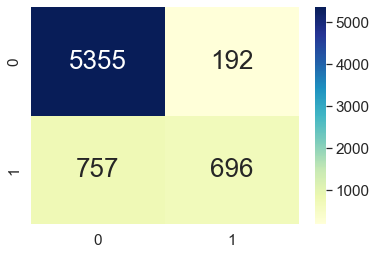

In [119]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_dt_cf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [120]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_dt_cf_test=confusion_matrix(y_test,dt_test_prediction)
print(x_dt_cf_test)

[[2331   85]
 [ 320  264]]


Train confusion matrix


<AxesSubplot:>

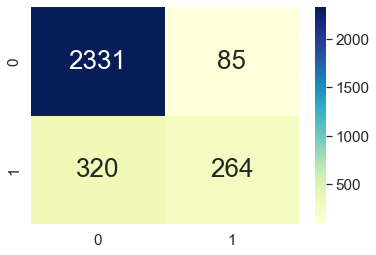

In [121]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_dt_cf_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [122]:
#Precison
#training data
from sklearn.metrics import precision_score
x_dt_cf_train=precision_score(y_train,dt_train_prediction)
print("The precision of svm for training data",x_dt_cf_train)

The precision of svm for training data 0.7837837837837838


In [123]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_dt_cf_test=precision_score(y_test,dt_test_prediction)
print("The precision of  Decision Tree for training data",x_dt_cf_test)

The precision of  Decision Tree for training data 0.7564469914040115


In [124]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_dt_r_train=recall_score(y_train,dt_train_prediction)
print("The recall of training data for Decision Tree is",x_dt_r_train)

The recall of training data for Decision Tree is 0.47900894700619406


In [125]:
#RECALL
#Testing DATA
from sklearn.metrics import recall_score
x_dt_r_test=recall_score(y_test,dt_test_prediction)
print("The recall of training data for Decision Tree is",x_dt_r_test)

The recall of training data for Decision Tree is 0.4520547945205479


In [126]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,dt_train_prediction)

print("Training accuracy of svm",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,dt_test_prediction)

print("Testing accuracy of svm ",b)

Training accuracy of svm 0.8644285714285714
Testing accuracy of svm  0.865


# Random Forest

In [127]:
#Training random forest after applying SMOTE technique.
#here we are using GridSearchCV to tune the hyperparamters we have in randomforest to see which 
# parameters works best.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200,300, 500],
    'max_depth' : [4,5,6]
}
rfc=RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1)

In [128]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 6, 'n_estimators': 200}


In [129]:
#training the random forest model
rfc_new=RandomForestClassifier(criterion= 'entropy', max_depth= 6, max_features= 'auto', n_estimators=500,random_state=42)
random_forest_model=rfc_new.fit(X_train,y_train)

In [130]:
#predictions
rf_predictions_test=random_forest_model.predict(X_test)
rf_predictions_train=random_forest_model.predict(X_train)

In [131]:
#evaluation of random forest with smote
from sklearn.metrics import f1_score
X_test_F1score=f1_score(y_test,rf_predictions_test)
print("Testing f1 score is",X_test_F1score) #f1 score on test data

X_train_F1score=f1_score(y_train,rf_predictions_train)
print("Training f1 score is",X_train_F1score) #f1 score on train data

Testing f1 score is 0.4560509554140128
Training f1 score is 0.50199203187251


In [132]:
# confusion matrix
#training confusion matrix
from sklearn.metrics import confusion_matrix
x_rf_train=confusion_matrix(y_train,rf_predictions_train)
print(x_rf_train)

[[5496   51]
 [ 949  504]]


Train confusion matrix


<AxesSubplot:>

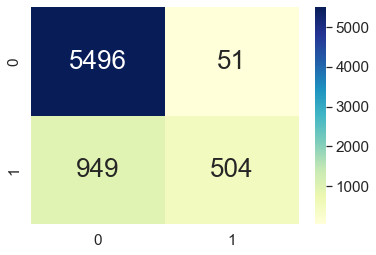

In [133]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_rf_train, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [134]:
# confusion matrix
#testing confusion matrix
from sklearn.metrics import confusion_matrix
x_rf_test=confusion_matrix(y_test,rf_predictions_test)
print(x_rf_test)

[[2394   22]
 [ 405  179]]


Train confusion matrix


<AxesSubplot:>

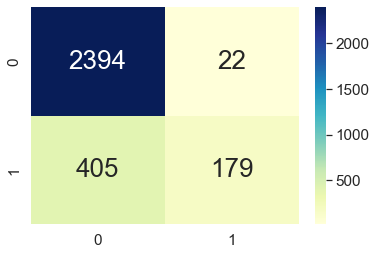

In [135]:
print("Train confusion matrix")
sns.set(font_scale=1.4)#for label size
sns.heatmap(x_rf_test, annot=True,annot_kws={"size": 26}, fmt='g',cmap="YlGnBu")

In [136]:
#Precison
#training data
from sklearn.metrics import precision_score
x_rf_cf_train=precision_score(y_train,rf_predictions_train)
print("The Precision for Random Forest training data",x_rf_cf_train)

The Precision for Random Forest training data 0.9081081081081082


In [137]:
#Precison
#testing data
from sklearn.metrics import precision_score
x_rf_cf_test=precision_score(y_test,rf_predictions_test)
print("The Precision for Random forest  testing data",x_rf_cf_test)

The Precision for Random forest  testing data 0.8905472636815921


In [138]:
#RECALL
#Training DATA
from sklearn.metrics import recall_score
x_rf_r_train=recall_score(y_train,rf_predictions_train)
print("The recall of training data for Random forest is",x_rf_r_train)

The recall of training data for Random forest is 0.34686854783207155


In [139]:
#RECALL
#Testing DATA
from sklearn.metrics import recall_score
x_rf_r_test=recall_score(y_test,rf_predictions_test)
print("The recall of testing data for Random forest is",x_rf_r_test)

The recall of testing data for Random forest is 0.3065068493150685


In [140]:
#accuracy
from sklearn.metrics import accuracy_score
a=accuracy_score(y_train,rf_predictions_train)

print("Training accuracy of Random Forest",a)

from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,rf_predictions_test)

print("Testing accuracy of Random Forest ",b)

Training accuracy of Random Forest 0.8571428571428571
Testing accuracy of Random Forest  0.8576666666666667


In [141]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
print("random Forest",precision_recall_fscore_support(y_test,rf_predictions_test,average='macro'))
print(accuracy_score(y_test,rf_predictions_test))

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
print("KNN",precision_recall_fscore_support(y_test,knn_test_prediction,average='macro'))
print(accuracy_score(y_test,knn_test_prediction))

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
print("decision tree",precision_recall_fscore_support(y_test,dt_test_prediction,average='macro'))
print(accuracy_score(y_test,dt_test_prediction))

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
print("SVM",precision_recall_fscore_support(y_test,svm_test_prediction,average='macro'))
print(accuracy_score(y_test,svm_test_prediction))

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
print("logistics",precision_recall_fscore_support(y_test,logistic_test_prediction,average='macro'))
print(accuracy_score(y_test,logistic_test_prediction))

random Forest (0.8729263649597672, 0.6487004445250839, 0.6870858803915701, None)
0.8576666666666667
KNN (0.6922784007097753, 0.5878589086455592, 0.6025515106702993, None)
0.813
decision tree (0.8178689125258458, 0.7084363376576249, 0.7429937233355988, None)
0.865
SVM (0.8361694556336939, 0.5816843191508664, 0.5947678051748876, None)
0.8323333333333334
logistics (0.6367591185410334, 0.7040903111675587, 0.637723922679466, None)
0.7053333333333334


In [142]:
#It is the evaluation measure to check the performance of the classification model
from sklearn.metrics import log_loss
log_loss(y_test,rf_predictions_test)

4.916025037256775

In [143]:
#It is the evaluation measure to check the performance of the classification model
from sklearn.metrics import log_loss
log_loss(y_test,knn_test_prediction)

6.458779171758356

In [144]:
#It is the evaluation measure to check the performance of the classification model
from sklearn.metrics import log_loss
log_loss(y_test,dt_test_prediction)

4.6627574685734645

In [145]:
#It is the evaluation measure to check the performance of the classification model
from sklearn.metrics import log_loss
log_loss(y_test,svm_test_prediction)

5.791006572997084

In [146]:
#It is the evaluation measure to check the performance of the classification model
from sklearn.metrics import log_loss
log_loss(y_test,logistic_test_prediction)

10.177615349092163

In [150]:
!pip install prettytable
from prettytable import PrettyTable
columns=(["ALGORITHM", "ACCURACY","PRECISION","RECALL","F1"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logistic Regression","SVM", "DECISION TREE" ,"Random Forest"])
myTable.add_column(columns[1], [" 81"," 70%","83%", "86%", "85%"])
myTable.add_column(columns[2], ["69 ","63%","83%", "81%","87%"])
myTable.add_column(columns[3], ["58% ","70%","58%", "70%","64%"])
myTable.add_column(columns[4], ["60% ","63%","59%", "73%","68%"])

print(myTable)

+---------------------+----------+-----------+--------+------+
|      ALGORITHM      | ACCURACY | PRECISION | RECALL |  F1  |
+---------------------+----------+-----------+--------+------+
|         KNN         |    81    |    69     |  58%   | 60%  |
| Logistic Regression |    70%   |    63%    |  70%   | 63%  |
|         SVM         |   83%    |    83%    |  58%   | 59%  |
|    DECISION TREE    |   86%    |    81%    |  70%   | 73%  |
|    Random Forest    |   85%    |    87%    |  64%   | 68%  |
+---------------------+----------+-----------+--------+------+


# Conclusion :
We have seen Decision Tree is giving the best Accuracy and f1, Precision score and show less log_loss
we can use this algorithm for the production